In [1]:
!pip install -q ace_tools_open

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ace_tools_open as tools

In [3]:
"""

Benford's Law Analysis

- populations: Pandas Series with population numbers

Returns:
- TVD between the empirical and theoretical distributions, and some of the theoretical
characteristics of the empirical data (populations), such as the stopping probability
(p_S) and the maximum binary length (N) for Benford scaling invariance.

Outputs the histogram of leading digit frequencies for the population numbers,
and the theoretical Benford's distribution.

"""

def tvd_analysis_benford(populations, plots=True):

  # Extract leading digits
  leading_digits = populations.astype(str).str[0].astype(int)

  # Empirical Distribution
  empirical_counts = leading_digits.value_counts().sort_index()
  empirical_probs = empirical_counts / empirical_counts.sum()

  # Benford's Distribution
  benford_probs = {d: np.log10(1 + 1/d) for d in range(1, 10)}

  # Comparison using TVD
  tvd = 0.5 * sum(abs(empirical_probs.get(d, 0) - benford_probs[d]) for d in range(1, 10))

  # Visualization
  digits = np.array(range(1, 10))
  empirical_values = [empirical_probs.get(d, 0) for d in digits]
  benford_values = [benford_probs[d] for d in digits]

  if plots:
    plt.figure(figsize=(10, 6))
    plt.bar(digits, empirical_values, width=0.4, label='Empirical', align='center')
    plt.bar(digits, benford_values, width=0.4, label='Benford', align='edge')
    plt.xlabel('Leading Digit')
    plt.ylabel('Probability')
    plt.title('Leading Digit Distribution: Empirical vs. Benford\'s Law')
    plt.xticks(digits)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

  # Compute the binary lengths (number of bits) for each sampled number
  binary_lengths = np.array([len(bin(n)) - 2 for n in populations])  # Remove '0b' from binary representation

  # Determine the maximum number of bits (N) in the dataset
  N = np.max(binary_lengths)  # N is the maximum number of bits in the dataset
  p_S_empirical = 1.0 / np.mean(binary_lengths)  # Average over all estimates

  test_results_df = pd.DataFrame(
      {
          'TVD from Benford (theoretical)': [tvd],
          'Empirical Stopping Probability (p_S)': [p_S_empirical],
          'Maximum Binary Length (N)': [N],
          'Average Binary Length': [np.mean(binary_lengths)]
      }
  )

  return test_results_df

Generating 10000 binary numbers with probabilities:
p_0 = 0.32469081578810566, p_1 = 0.32469081578810566, p_S = 0.3506183684237887
Lambda = 1e-12


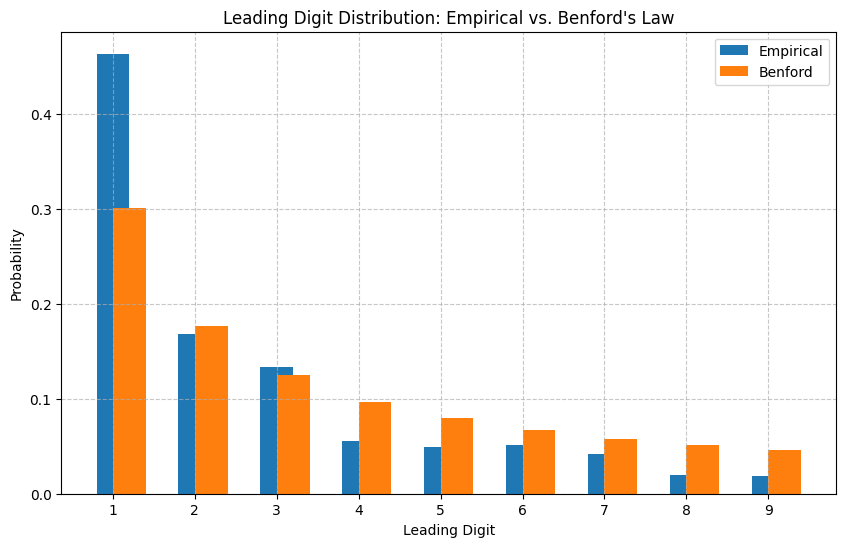

Test Results (Benford TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.40292109388074093, p_1 = 0.40292109388074093, p_S = 0.19415781223851813
Lambda = 1e-06


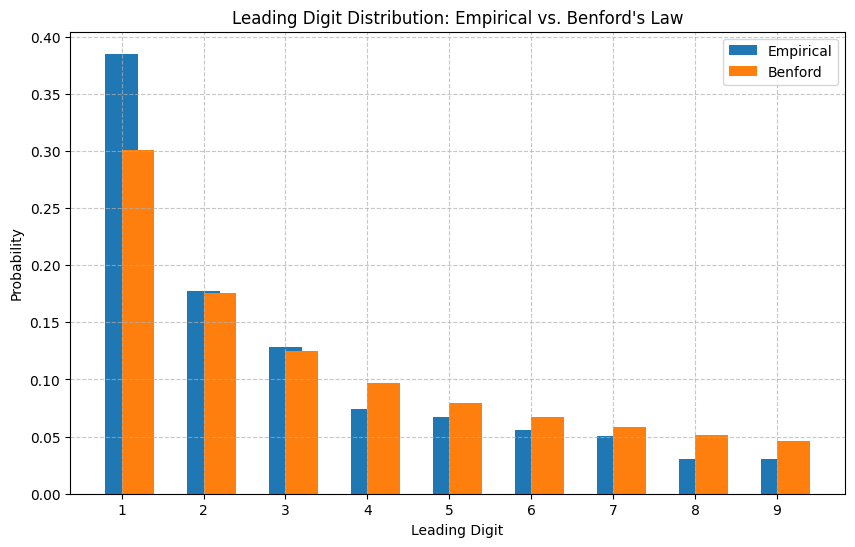

Test Results (Benford TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4823308099555996, p_1 = 0.4823308099555996, p_S = 0.03533838008880075
Lambda = 0.1


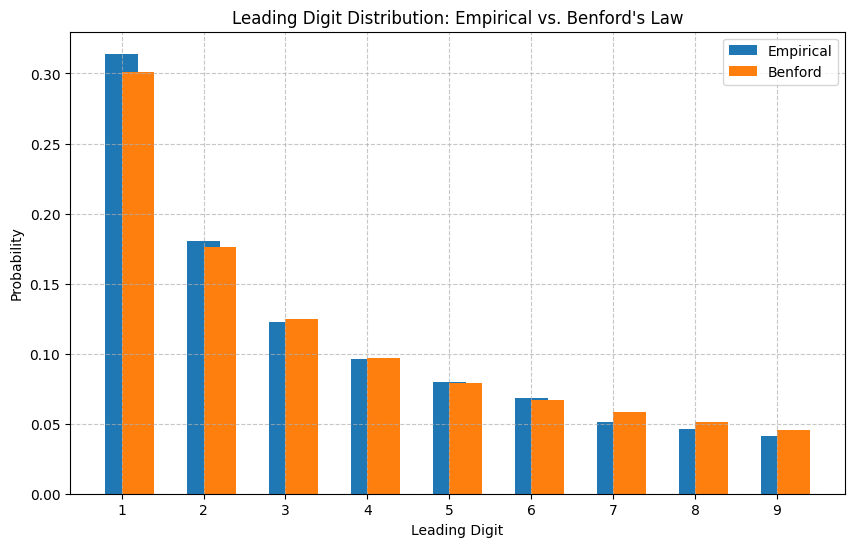

Test Results (Benford TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.48867416669197467, p_1 = 0.48867416669197467, p_S = 0.02265166661605067
Lambda = 0.230759776818


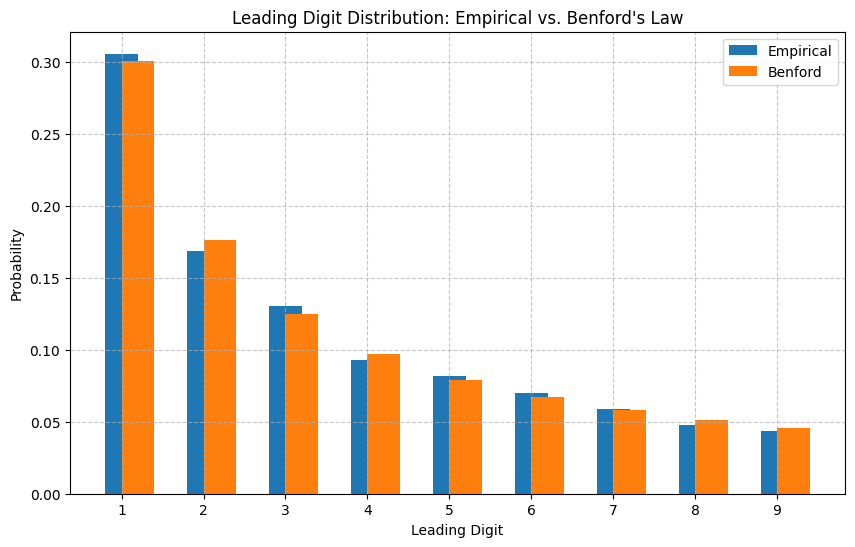

Test Results (Benford TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4906818838173888, p_1 = 0.4906818838173888, p_S = 0.018636232365222383
Lambda = 0.3


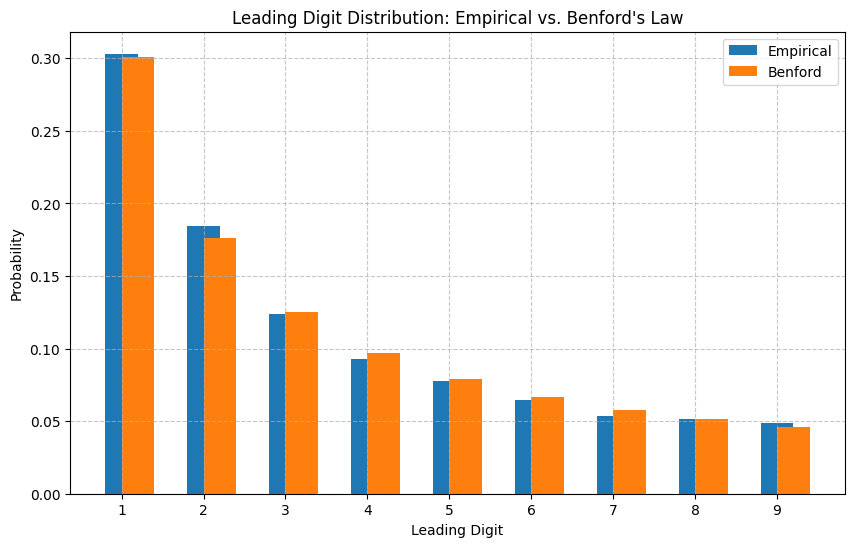

Test Results (Benford TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.49289247940165787, p_1 = 0.49289247940165787, p_S = 0.014215041196684264
Lambda = 0.4


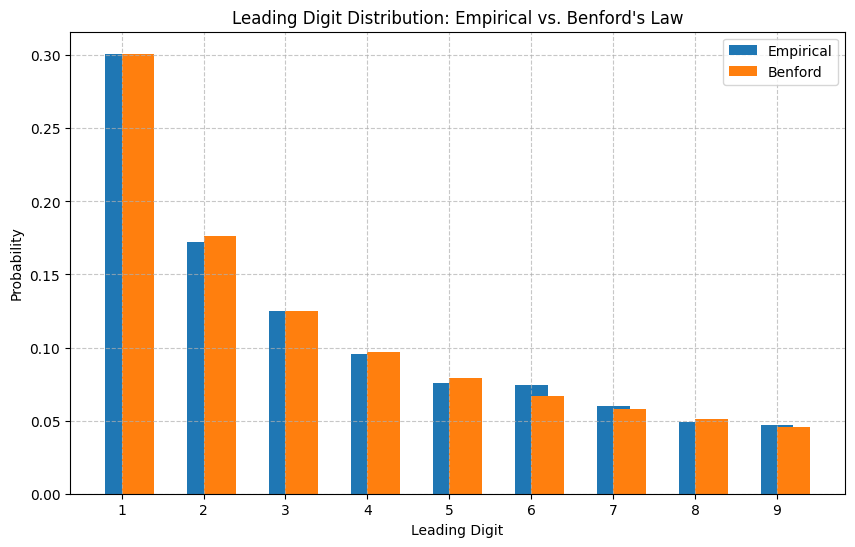

Test Results (Benford TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.49461400659698773, p_1 = 0.49461400659698773, p_S = 0.010771986806024536
Lambda = 0.5


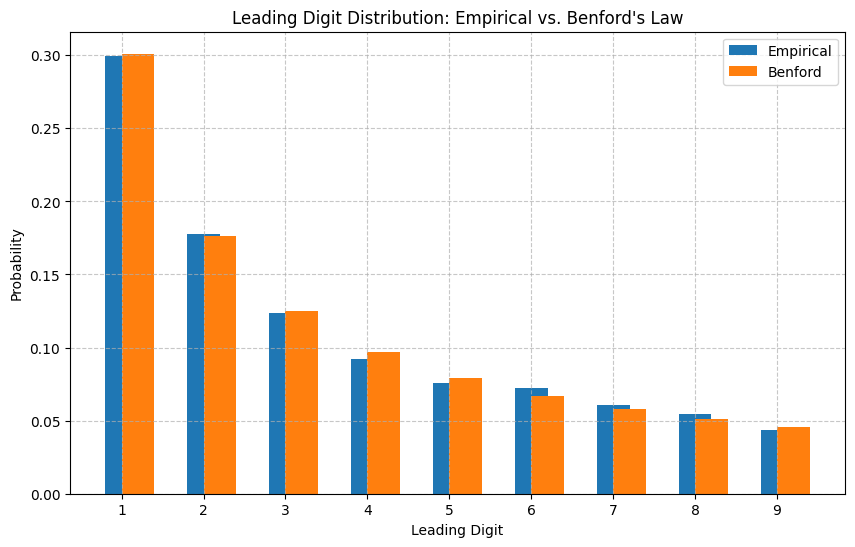

Test Results (Benford TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4960250592106636, p_1 = 0.4960250592106636, p_S = 0.007949881578672824
Lambda = 0.6


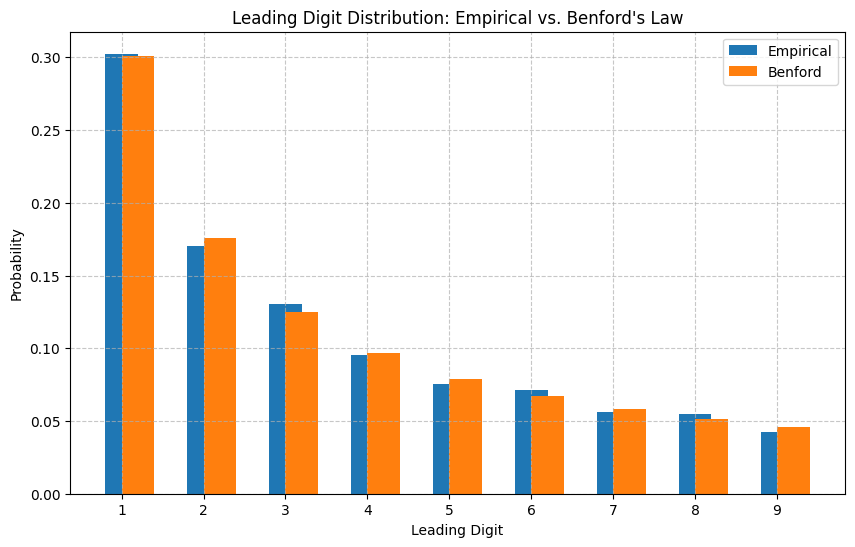

Test Results (Benford TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4972212273066173, p_1 = 0.4972212273066173, p_S = 0.00555754538676545
Lambda = 0.7


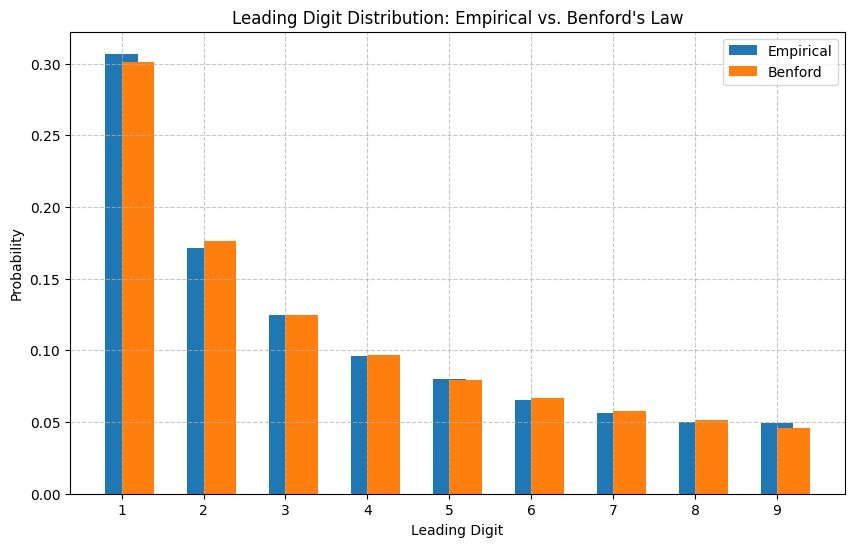

Test Results (Benford TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4982597266025944, p_1 = 0.4982597266025944, p_S = 0.0034805467948112456
Lambda = 0.8


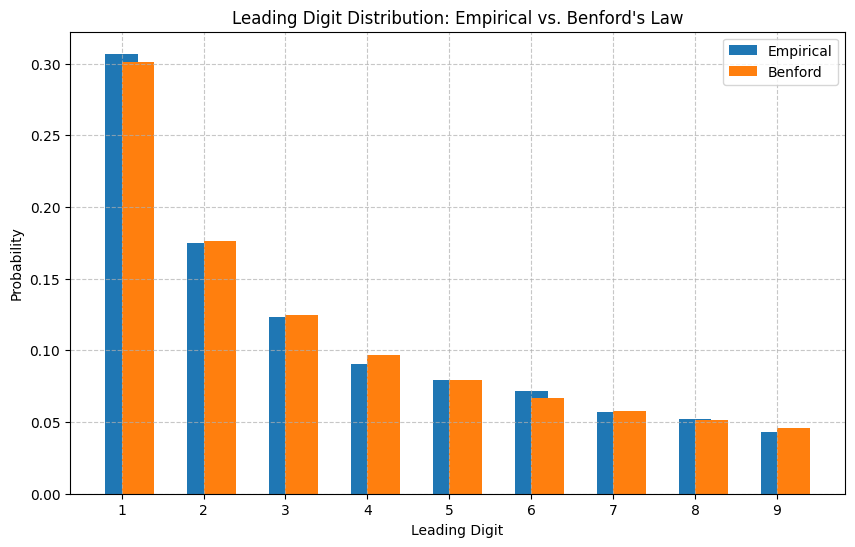

Test Results (Benford TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4991775481411712, p_1 = 0.4991775481411712, p_S = 0.0016449037176575754
Lambda = 0.9


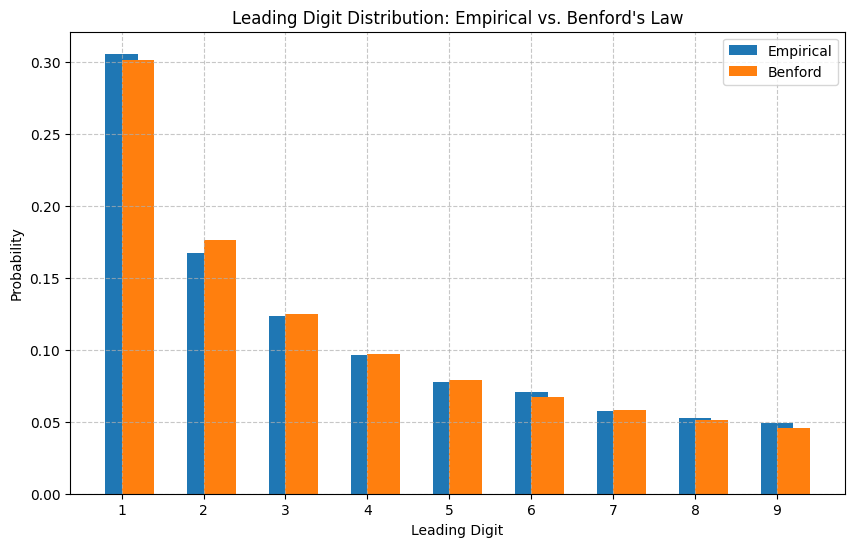

Test Results (Benford TVD Analysis)


In [4]:
import sys
sys.set_int_max_str_digits(100_000)

"""

Generating binary numbers as strings with probabilities
- p_0 for '0',
- p_1 for '1',
- p_S for stopping.

"""

def generate_binary_number(p_0, p_1, p_S):
  """Generates a binary number according to the process."""
  binary_number = '1'  # Always start with a leading 1
  while True:
      r = np.random.rand()
      if r < p_S:
          break  # Stop the process
      elif r < p_S + p_0:
          binary_number += '0'
      else:
          binary_number += '1'
  return int(binary_number, 2)

"""

Running experiemnts with the model, comparison with Benford's law, and plotting.

"""

def run_experiments_benford(num_numbers, N, lambdas, plots=True):

  tvds_measured = []

  for l in lambdas:  # Loop over lambdas

    # Probabilities for binary strings generation
    p_S = 1 - l**(1/N)  # Stopping probability
    p_0 = p_1 = l**(1/N) / 2  # Probability of 0 or 1

    if plots:
      print(f"Generating {num_numbers} binary numbers with probabilities:")
      print(f"p_0 = {p_0}, p_1 = {p_1}, p_S = {p_S}")
      print(f"Lambda = {l}")

    # Generate binary numbers
    binary_numbers = pd.Series([generate_binary_number(p_0, p_1, p_S) for _ in range(num_numbers)], dtype="object")

    # Run TVD analysis
    binary_analysis = tvd_analysis_benford(binary_numbers, plots=plots)
    if plots:
      tools.display_dataframe_to_user(name="Test Results (Benford TVD Analysis)", dataframe=binary_analysis)

    tvd_theoretical = binary_analysis['TVD from Benford (theoretical)'][0]
    tvds_measured.append([l, tvd_theoretical])

  return tvds_measured

#
lambdas = [1e-12, 1e-6, 0.1, 0.230759776818, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # Several lambdas

#
_ = run_experiments_benford(num_numbers=10_000, N=64, lambdas = lambdas, plots=True)

In [5]:
#
lambdas = [1e-12, 1e-6, 0.1, 0.230759776818, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # Several lambdas

#
benford_tvd_stats = []
num_trials = 10

# Run trials sequentially
for i in range(num_trials):
  print(f"Running trial {i+1} of {num_trials} ...")
  tvds_measured = run_experiments_benford(num_numbers=10_000, N=64, lambdas = lambdas, plots=False)
  benford_tvd_stats.append(tvds_measured)
  print("Done.")

Running trial 1 of 10 ...
Done.
Running trial 2 of 10 ...
Done.
Running trial 3 of 10 ...
Done.
Running trial 4 of 10 ...
Done.
Running trial 5 of 10 ...
Done.
Running trial 6 of 10 ...
Done.
Running trial 7 of 10 ...
Done.
Running trial 8 of 10 ...
Done.
Running trial 9 of 10 ...
Done.
Running trial 10 of 10 ...
Done.


In [6]:
"""

Plotting stats for each given lambda

"""

def plot_stats(lambdas, stats, value_name='TVD'):

  # Aggregate TVDs for each lambda
  lambda_val_map = {l: [] for l in lambdas}
  for trial in stats:
      for l, val in trial:
          lambda_val_map[l].append(val)

  # Compute mean and std deviation for each lambda
  mean_tvd = {l: np.mean(val_list) for l, val_list in lambda_val_map.items()}
  std_tvd = {l: np.std(val_list) for l, val_list in lambda_val_map.items()}

  # Prepare data for plotting
  lambdas_sorted = sorted(lambdas)
  mean_values = [mean_tvd[l] for l in lambdas_sorted]
  std_values = [std_tvd[l] for l in lambdas_sorted]

  # Plot the mean TVD with ±1 std deviation corridor
  plt.figure(figsize=(10, 6))
  plt.plot(lambdas_sorted, mean_values, label=f"Mean {value_name}", color="blue")
  plt.fill_between(
      lambdas_sorted,
      np.array(mean_values) - np.array(std_values),
      np.array(mean_values) + np.array(std_values),
      color="blue",
      alpha=0.2,
      label="±1 Std Dev"
  )
  plt.xlabel("Lambda")
  plt.ylabel(value_name)
  plt.title(f"Mean {value_name} with ±1 Std Deviation Corridor")
  plt.legend()
  plt.grid(True, linestyle="--", alpha=0.6)
  plt.show()

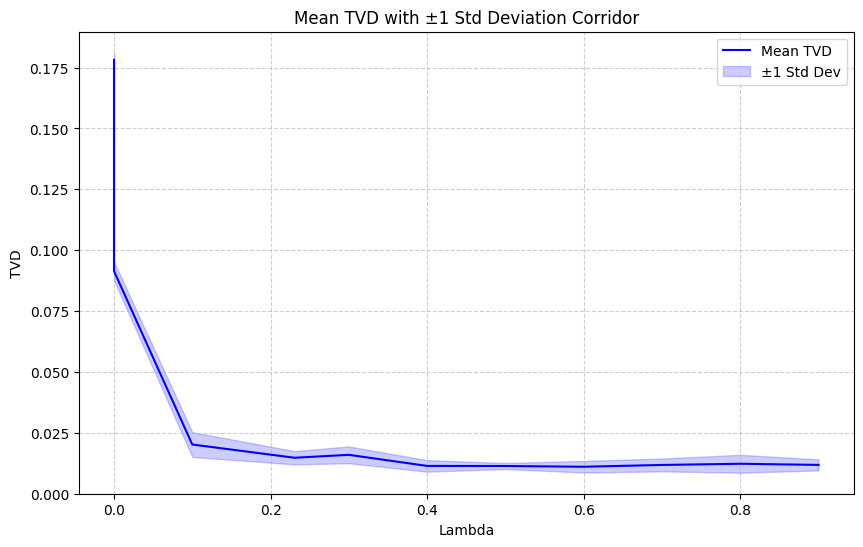

In [7]:
plot_stats(lambdas=lambdas, stats=benford_tvd_stats, value_name='TVD')

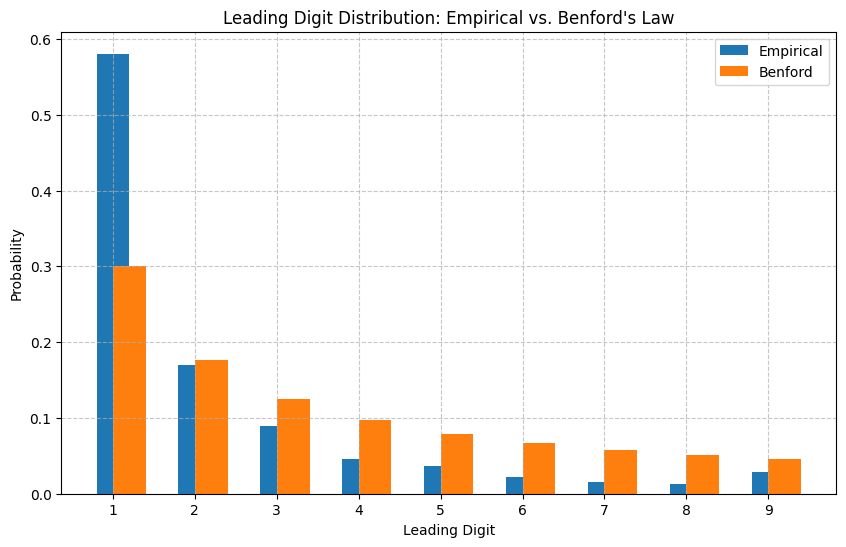

Test Results (Benford TVD Analysis)


In [8]:
# Load the dataset (City Population accross the Globe by the Year)
url = 'https://datahub.io/core/population-city/r/unsd-citypopulation-year-both.csv'
df = pd.read_csv(url)

# Filter for the most recent year available
latest_year = '2023'
df_latest = df[df['Year'] == latest_year]

# Extract population values and drop missing or non-numeric entries
populations = pd.to_numeric(df_latest['Value'], errors='coerce').dropna().astype(int)

# Compare to Benford's distribution
city_pop_analysis_benford = tvd_analysis_benford(populations)
tools.display_dataframe_to_user(name="Test Results (Benford TVD Analysis)", dataframe=city_pop_analysis_benford)

Generating 596 binary numbers with probabilities:
p_0 = 0.4726555, p_1 = 0.4726555, p_S = 0.05468899999999999
Lambda = 0.24511381445157215


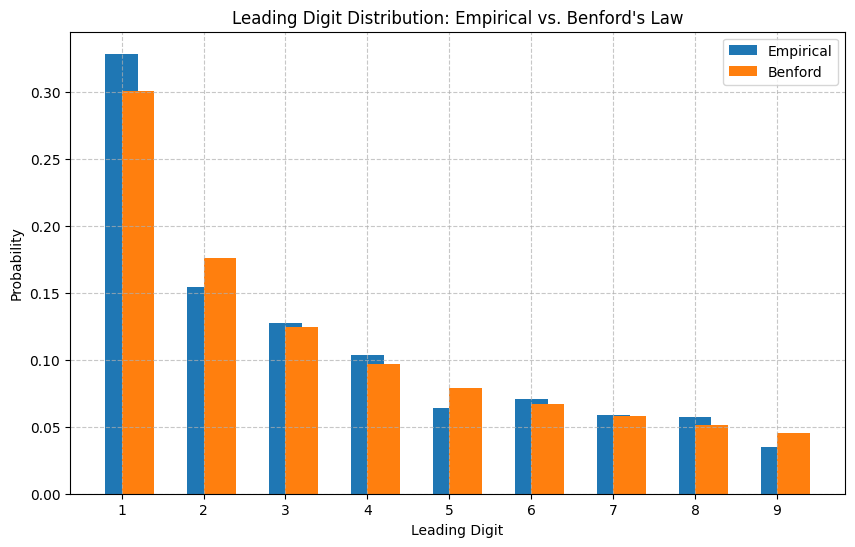

Test Results (Benford TVD Analysis)


In [9]:
N = 25
p_S_empirical = 0.054689
l = (1-p_S_empirical)**N
_ = run_experiments_benford(num_numbers=len(populations), N=N, lambdas=[l])

In [10]:
"""

Zipf's Law Analysis

- populations: Pandas Series with population numbers

Returns:
- TVD between the empirical and theoretical distributions, and some of the theoretical
characteristics of the empirical data (populations), such as the stopping probability
(p_S) and the maximum binary length (N), and fitted parameters (C, s) of Zipf's
distribution.

Outputs the histogram of leading digit frequencies for the population numbers,
and the theoretical Zipf's distribution.

"""

# Function for Zipf's Law: P(d) = C / d^s
def zipf_first_digit(d, C, s):
    return C / d**s

from scipy.optimize import curve_fit

def tvd_analysis_zipf(populations, s_bounds=[1.0, np.inf], plots=True):

  # Extract leading digits
  leading_digits = populations.astype(str).str[0].astype(int)

  # Empirical Distribution
  unique_digits, digit_counts = np.unique(leading_digits, return_counts=True)
  empirical_probs = digit_counts / digit_counts.sum()

  # Fit Zipf's law to first digits
  popt, pcov = curve_fit(zipf_first_digit,
                         unique_digits,
                         empirical_probs,
                         bounds = [[0, s_bounds[0]], [np.inf, s_bounds[1]]])
  C_fit, s_fit = popt

  # Compute expected probabilities using fitted parameters
  zipf_probs = zipf_first_digit(unique_digits, C_fit, s_fit)
  zipf_probs /= zipf_probs.sum()  # Normalize

  # Comparison using TVD
  tvd = 0.5 * np.sum(np.abs(empirical_probs - zipf_probs))

  # Visualization
  sorted_indices = np.argsort(unique_digits)
  digits = unique_digits[sorted_indices]
  empirical_values = empirical_probs[sorted_indices]
  zipf_values = zipf_probs[sorted_indices]

  if plots:
    plt.figure(figsize=(10, 6))
    plt.bar(digits, empirical_values, width=0.4, label='Empirical', align='center')
    plt.bar(digits, zipf_values, width=0.4, label='Zipf', align='edge')
    plt.xlabel('Leading Digit')
    plt.ylabel('Probability')
    plt.title('Leading Digit Distribution: Empirical vs. Zipf\'s Law')
    plt.xticks(digits)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

  # Compute the binary lengths (number of bits) for each sampled number
  binary_lengths = np.array([len(bin(n)) - 2 for n in populations])  # Remove '0b' from binary representation

  # Determine the maximum number of bits (N) in the dataset
  N = np.max(binary_lengths)  # N is the maximum number of bits in the dataset
  p_S_empirical = 1.0 / np.mean(binary_lengths)  # Average over all estimates

  test_results_df = pd.DataFrame(
      {
          'Fitted Zipf\'s C': [C_fit],
          'Fitted Zipf\'s s': [s_fit],
          'TVD from Zipf (theoretical)': [tvd],
          'Empirical Stopping Probability (p_S)': [p_S_empirical],
          'Maximum Binary Length (N)': [N],
          'Average Binary Length': [np.mean(binary_lengths)]
      }
  )

  return test_results_df

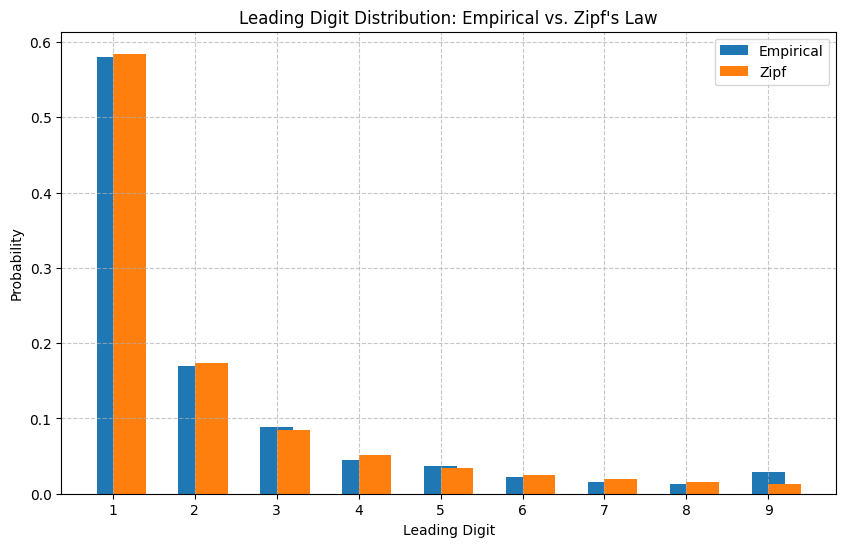

Test Results (Zipf TVD Analysis)


In [23]:
# Compare to Zipf's distribution
city_pop_analysis_zipf = tvd_analysis_zipf(populations, s_bounds=[1.0, 2.0], plots=True)
tools.display_dataframe_to_user(name="Test Results (Zipf TVD Analysis)", dataframe=city_pop_analysis_zipf)

Generating 10000 binary numbers with probabilities:
p_0 = 0.32469081578810566, p_1 = 0.32469081578810566, p_S = 0.3506183684237887
Lambda = 1e-12


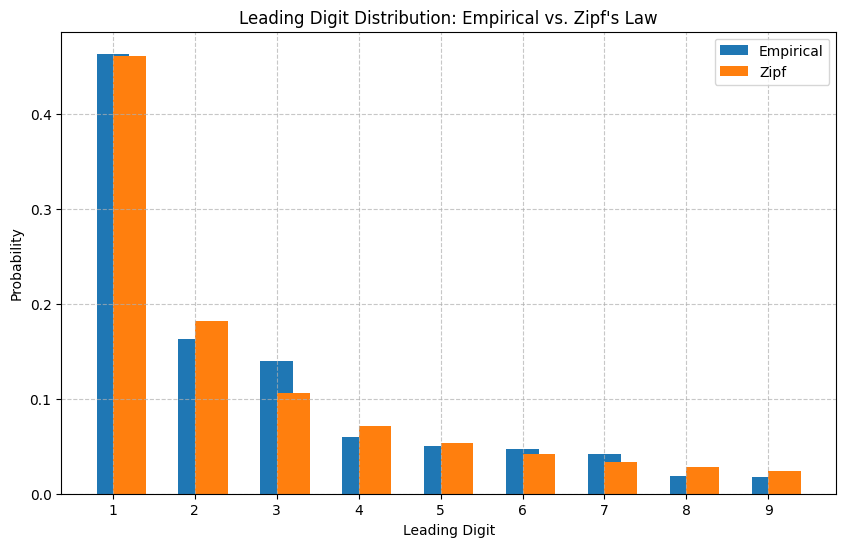

Test Results (Zipf TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.40292109388074093, p_1 = 0.40292109388074093, p_S = 0.19415781223851813
Lambda = 1e-06


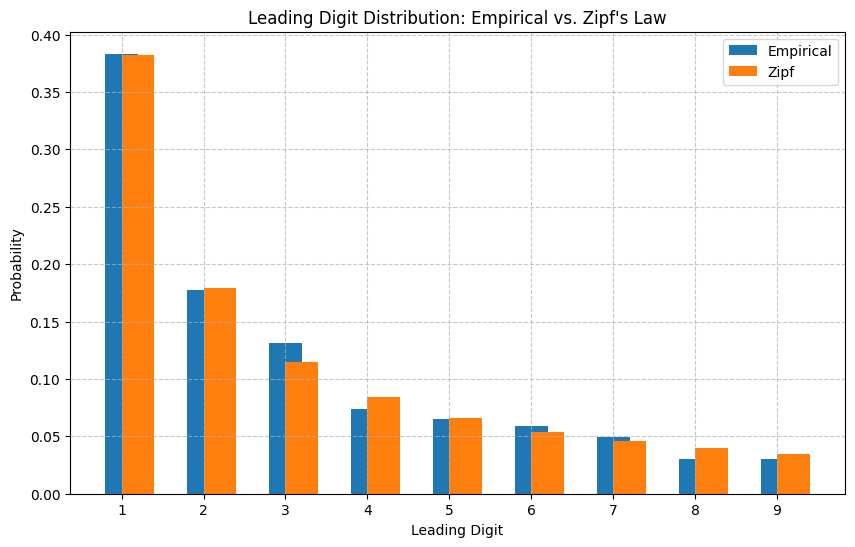

Test Results (Zipf TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4823308099555996, p_1 = 0.4823308099555996, p_S = 0.03533838008880075
Lambda = 0.1


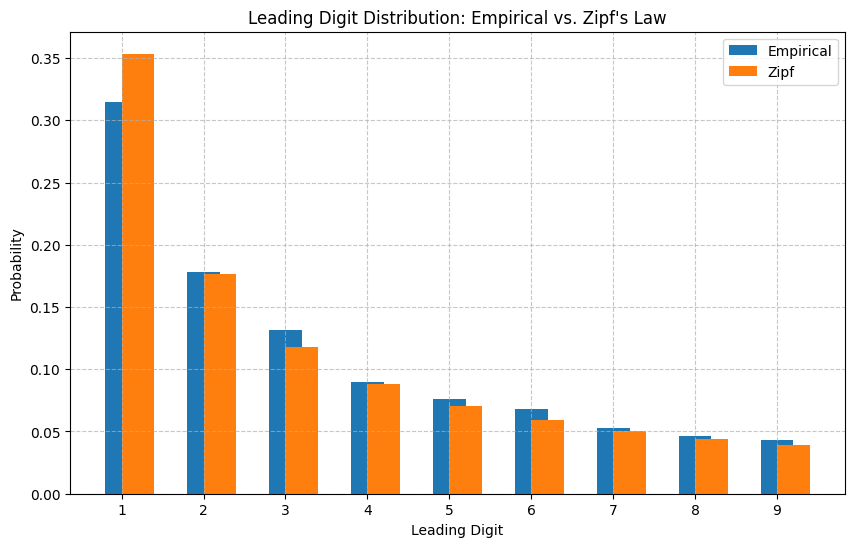

Test Results (Zipf TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.48867416669197467, p_1 = 0.48867416669197467, p_S = 0.02265166661605067
Lambda = 0.230759776818


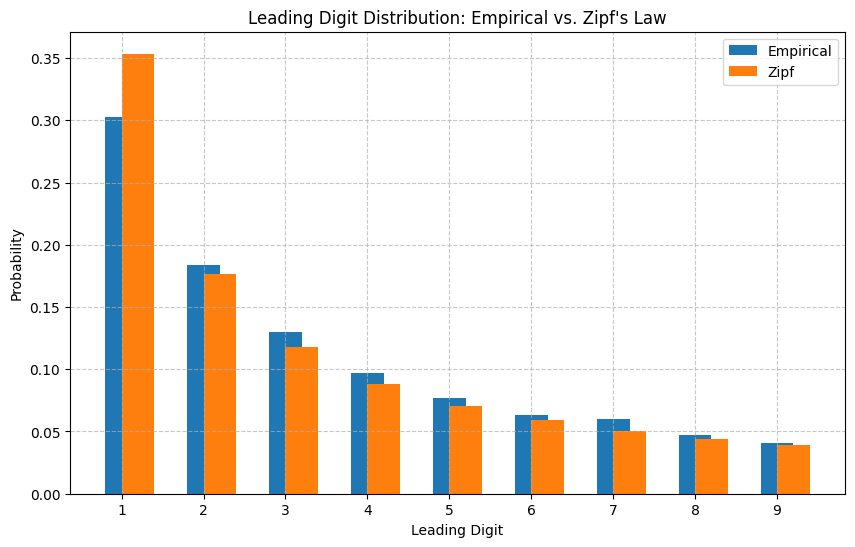

Test Results (Zipf TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4906818838173888, p_1 = 0.4906818838173888, p_S = 0.018636232365222383
Lambda = 0.3


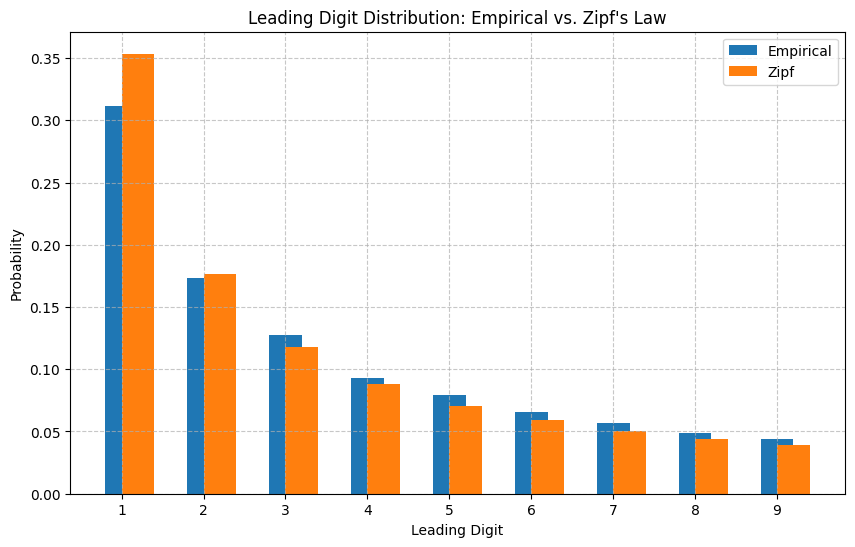

Test Results (Zipf TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.49289247940165787, p_1 = 0.49289247940165787, p_S = 0.014215041196684264
Lambda = 0.4


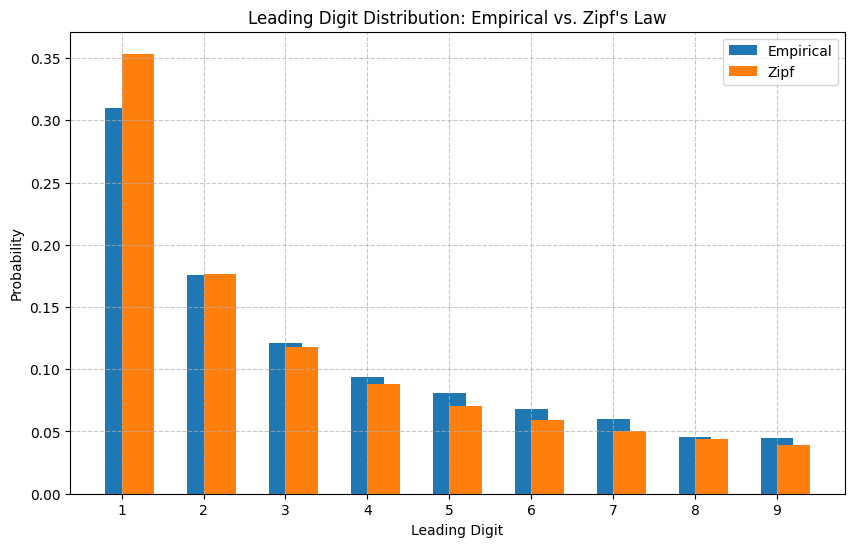

Test Results (Zipf TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.49461400659698773, p_1 = 0.49461400659698773, p_S = 0.010771986806024536
Lambda = 0.5


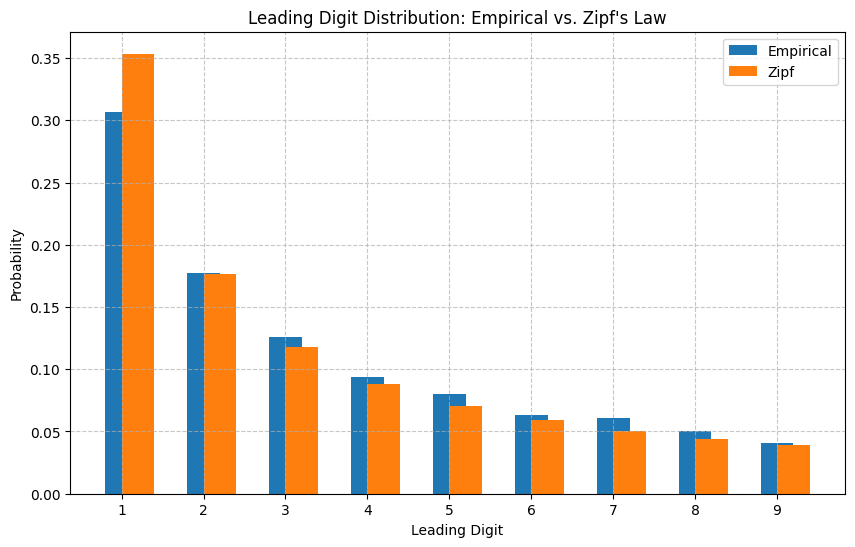

Test Results (Zipf TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4960250592106636, p_1 = 0.4960250592106636, p_S = 0.007949881578672824
Lambda = 0.6


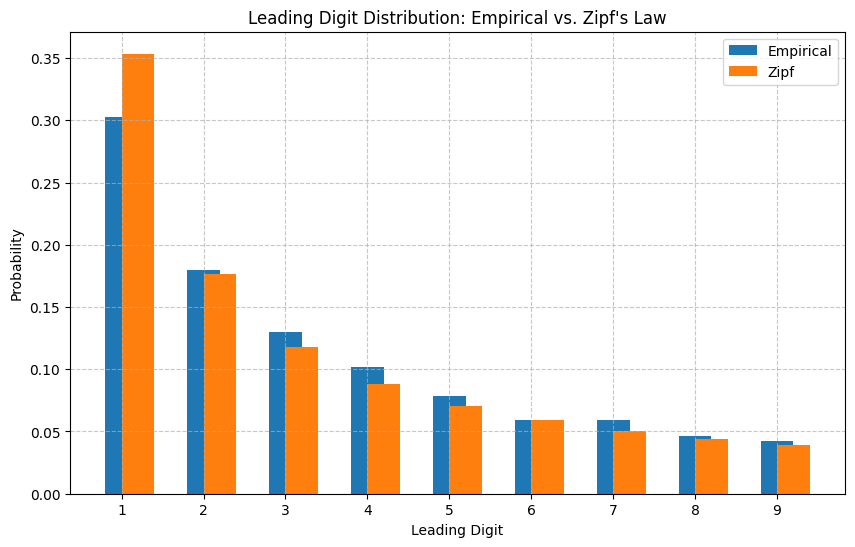

Test Results (Zipf TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4972212273066173, p_1 = 0.4972212273066173, p_S = 0.00555754538676545
Lambda = 0.7


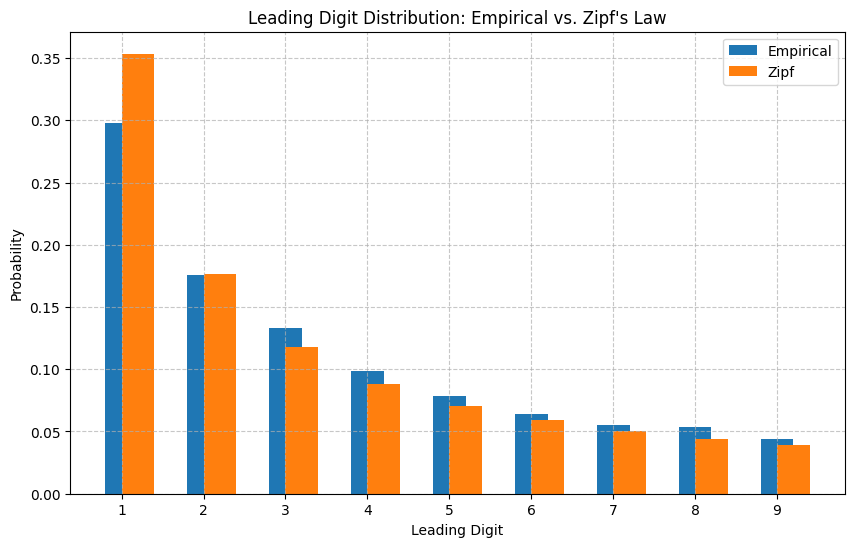

Test Results (Zipf TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4982597266025944, p_1 = 0.4982597266025944, p_S = 0.0034805467948112456
Lambda = 0.8


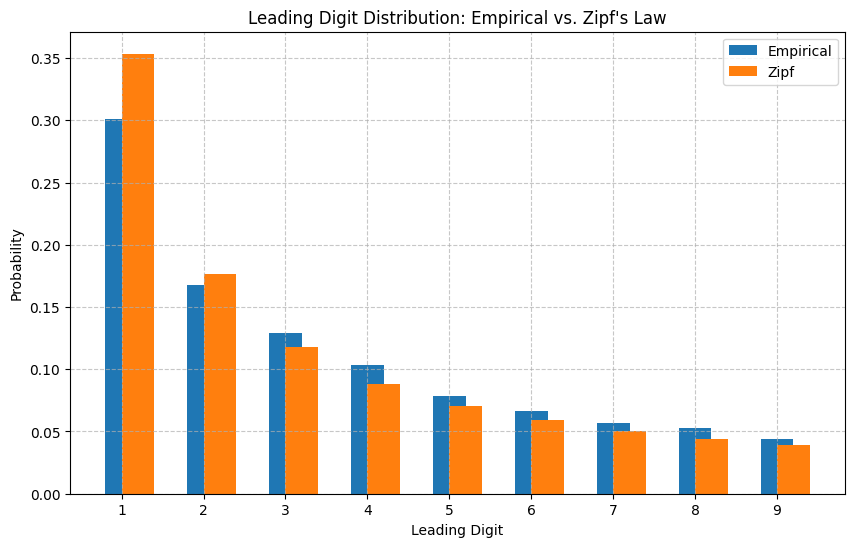

Test Results (Zipf TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4991775481411712, p_1 = 0.4991775481411712, p_S = 0.0016449037176575754
Lambda = 0.9


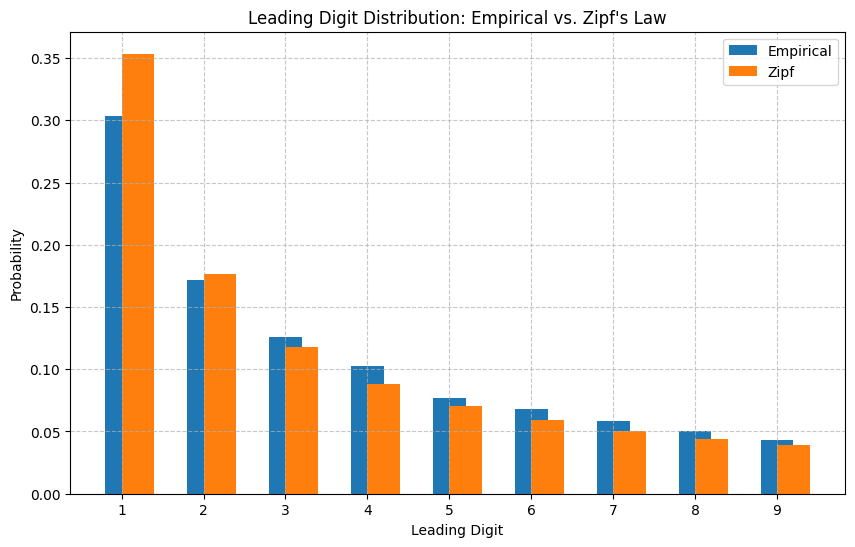

Test Results (Zipf TVD Analysis)


In [12]:

"""

Running experiemnts with the model, comparison with Zipf's law, and plotting.

"""

def run_experiments_zipf(num_numbers, N, lambdas, s_bounds = [1.0, np.inf], plots=True):

  tvds_measured = []
  s_measured = []

  for l in lambdas:  # Loop over lambdas

    # Probabilities for binary strings generation
    p_S = 1 - l**(1/N)  # Stopping probability
    p_0 = p_1 = l**(1/N) / 2  # Probability of 0 or 1

    if plots:
      print(f"Generating {num_numbers} binary numbers with probabilities:")
      print(f"p_0 = {p_0}, p_1 = {p_1}, p_S = {p_S}")
      print(f"Lambda = {l}")

    # Generate binary numbers
    binary_numbers = pd.Series([generate_binary_number(p_0, p_1, p_S) for _ in range(num_numbers)], dtype="object")

    # Run TVD analysis
    binary_analysis = tvd_analysis_zipf(binary_numbers, s_bounds=s_bounds, plots=plots)
    if plots:
      tools.display_dataframe_to_user(name="Test Results (Zipf TVD Analysis)", dataframe=binary_analysis)

    tvd_theoretical = binary_analysis['TVD from Zipf (theoretical)'][0]
    s_fit = binary_analysis['Fitted Zipf\'s s'][0]
    tvds_measured.append([l, tvd_theoretical])
    s_measured.append([l, s_fit])

  return tvds_measured, s_measured

#
lambdas = [1e-12, 1e-6, 0.1, 0.230759776818, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # Several lambdas

#
_, _ = run_experiments_zipf(num_numbers=10_000, N=64, lambdas = lambdas, s_bounds=[1.0, 1.5], plots=True)

In [13]:
#
lambdas = [1e-12, 1e-6, 0.1, 0.230759776818, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # Several lambdas

#
zipf_tvd_stats = []
zipf_s_stats = []
num_trials = 10

# Run trials sequentially
for i in range(num_trials):
  print(f"Running trial {i+1} of {num_trials} ...")
  tvds_measured, s_measured = run_experiments_zipf(num_numbers=10_000, N=64, lambdas = lambdas, plots=False)
  zipf_tvd_stats.append(tvds_measured)
  zipf_s_stats.append(s_measured)
  print("Done.")

Running trial 1 of 10 ...
Done.
Running trial 2 of 10 ...
Done.
Running trial 3 of 10 ...
Done.
Running trial 4 of 10 ...
Done.
Running trial 5 of 10 ...
Done.
Running trial 6 of 10 ...
Done.
Running trial 7 of 10 ...
Done.
Running trial 8 of 10 ...
Done.
Running trial 9 of 10 ...
Done.
Running trial 10 of 10 ...
Done.


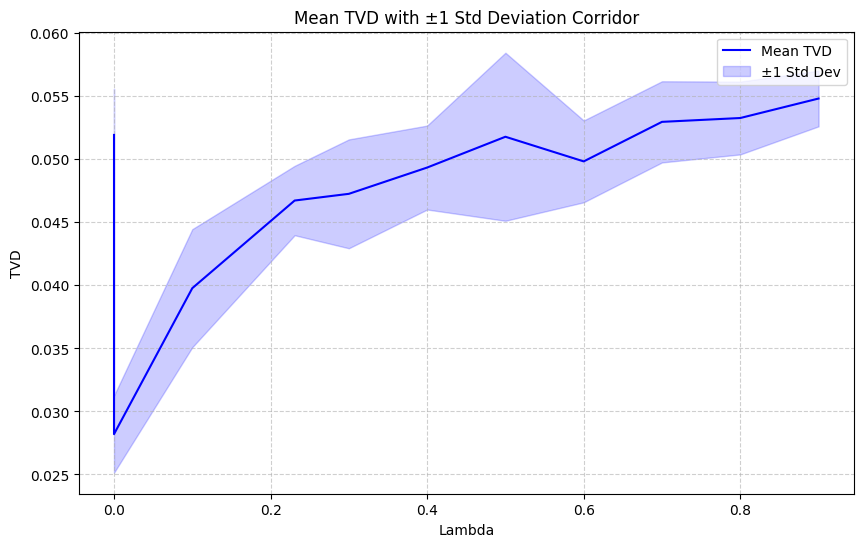

In [14]:
plot_stats(lambdas=lambdas, stats=zipf_tvd_stats, value_name='TVD')

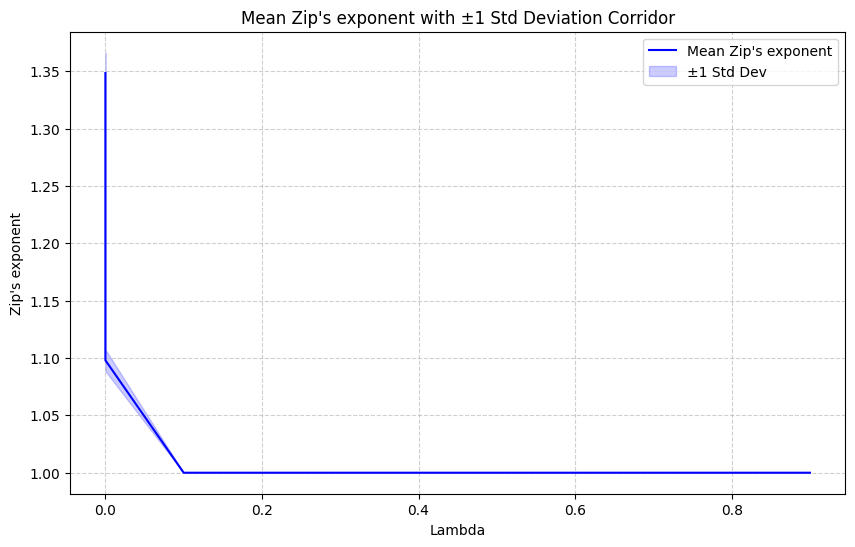

In [15]:
plot_stats(lambdas=lambdas, stats=zipf_s_stats, value_name='Zip\'s exponent')

Generating 10000 binary numbers with probabilities:
p_0 = 0.32469081578810566, p_1 = 0.32469081578810566, p_S = 0.3506183684237887
Lambda = 1e-12


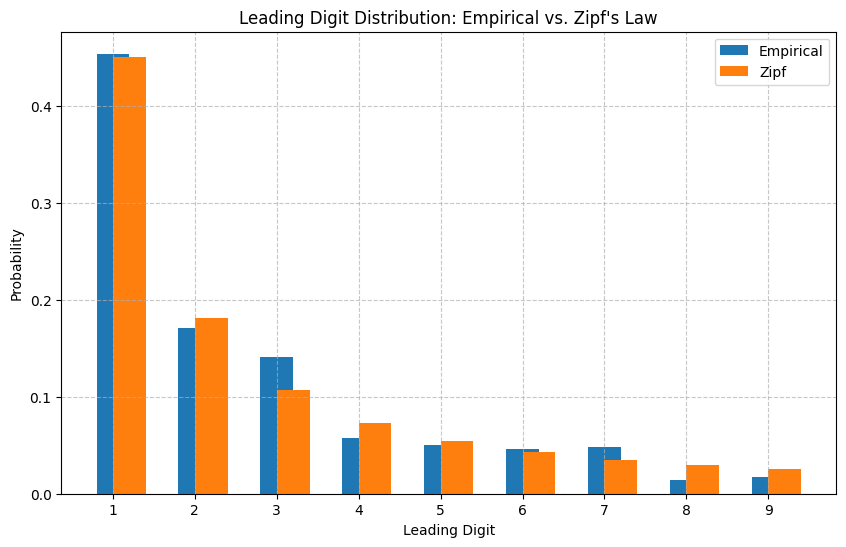

Test Results (Zipf TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.3489152924299332, p_1 = 0.3489152924299332, p_S = 0.3021694151401336
Lambda = 1e-10


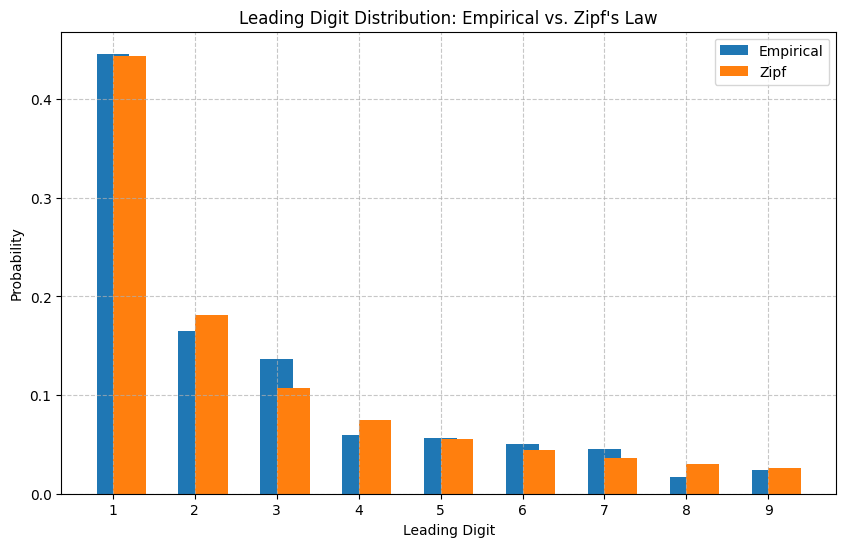

Test Results (Zipf TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.37494710466622794, p_1 = 0.37494710466622794, p_S = 0.2501057906675441
Lambda = 1e-08


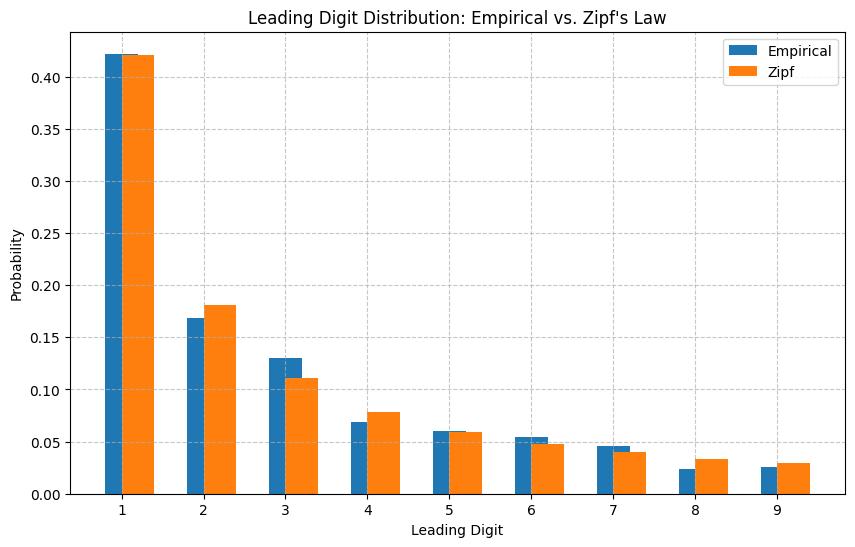

Test Results (Zipf TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.3886825151193879, p_1 = 0.3886825151193879, p_S = 0.2226349697612242
Lambda = 1e-07


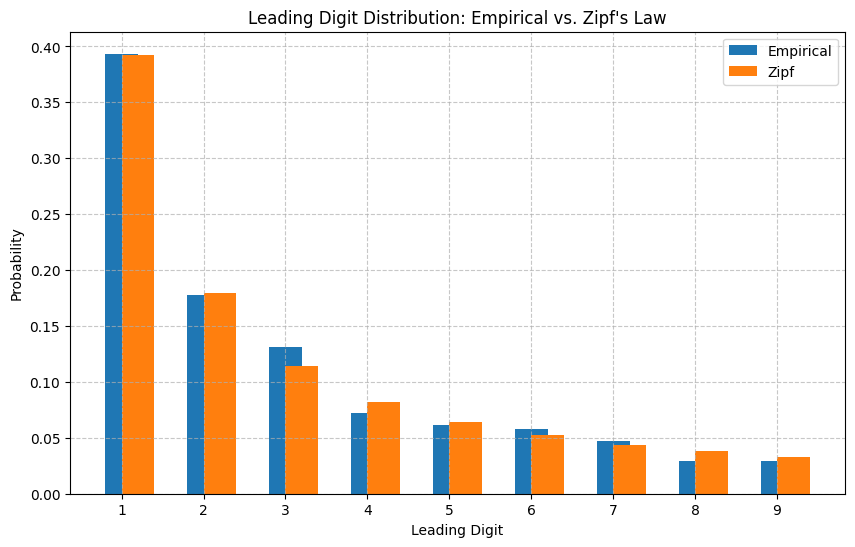

Test Results (Zipf TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.40292109388074093, p_1 = 0.40292109388074093, p_S = 0.19415781223851813
Lambda = 1e-06


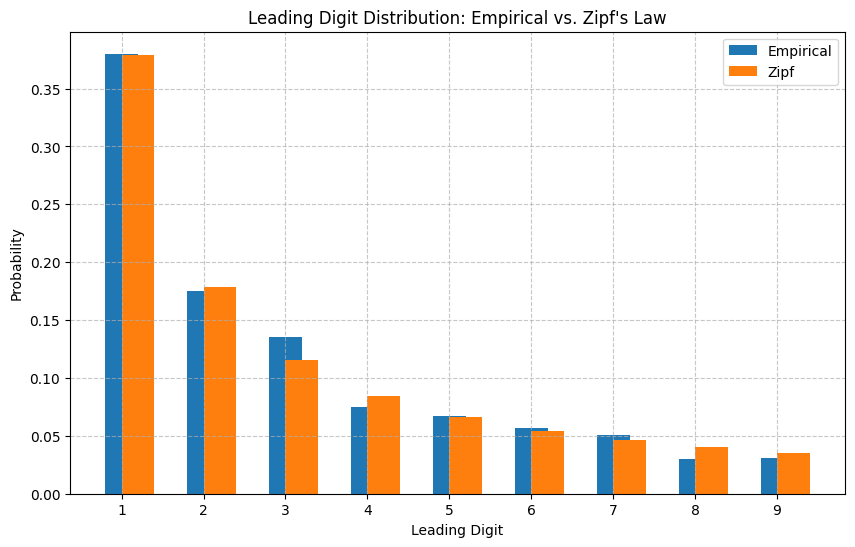

Test Results (Zipf TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4176812734789131, p_1 = 0.4176812734789131, p_S = 0.1646374530421738
Lambda = 1e-05


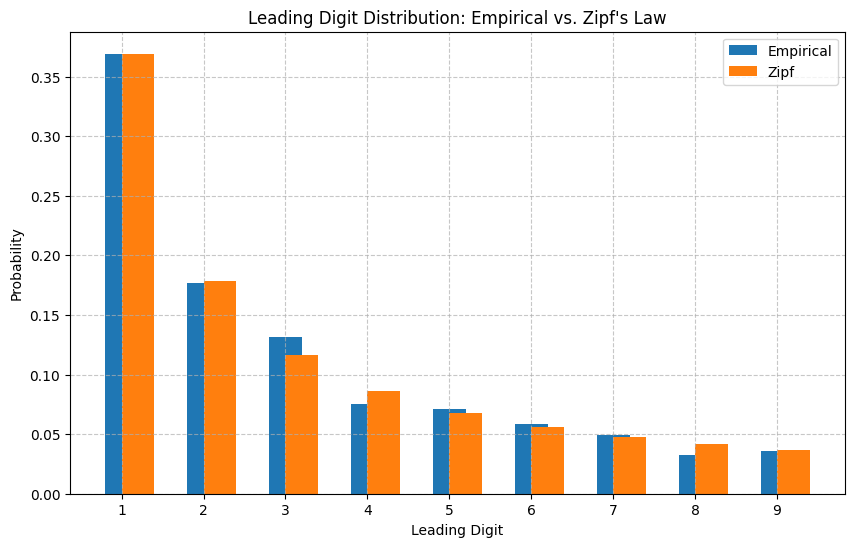

Test Results (Zipf TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4329821616800327, p_1 = 0.4329821616800327, p_S = 0.13403567663993465
Lambda = 0.0001


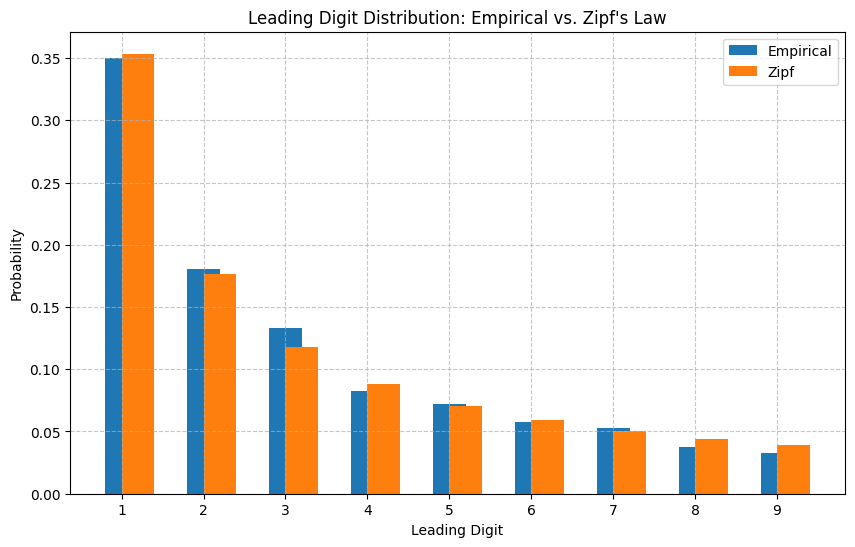

Test Results (Zipf TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4488435662236571, p_1 = 0.4488435662236571, p_S = 0.10231286755268576
Lambda = 0.001


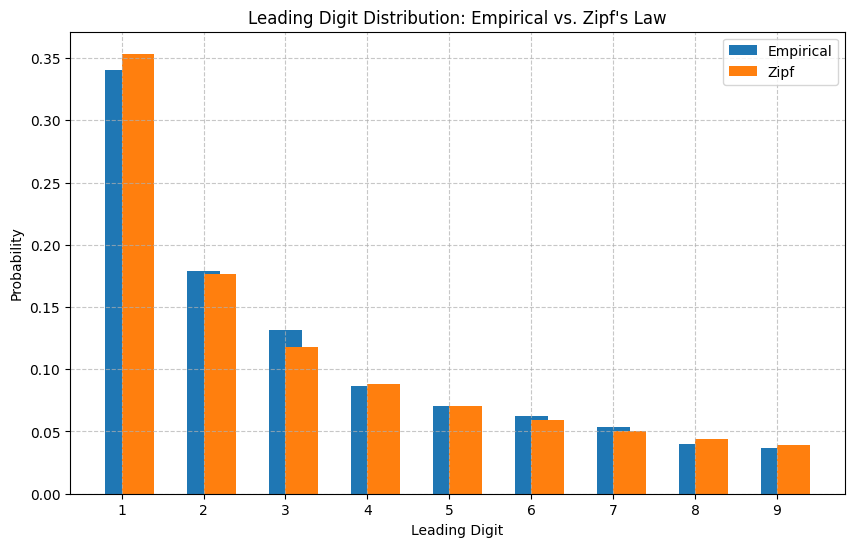

Test Results (Zipf TVD Analysis)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4652860204648495, p_1 = 0.4652860204648495, p_S = 0.06942795907030097
Lambda = 0.01


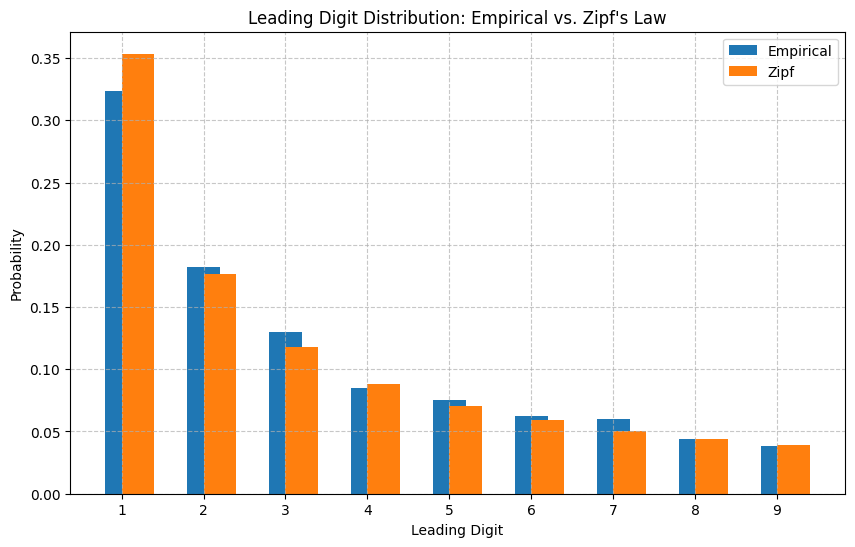

Test Results (Zipf TVD Analysis)


In [16]:
#
more_lambdas = [1e-12, 1e-10, 1e-8, 1e-7, 1e-6,1e-5, 1e-4, 1e-3, 1e-2] # Several lambdas

_, _ = run_experiments_zipf(num_numbers=10_000, N=64, lambdas = more_lambdas, s_bounds=[1.0, 1.5], plots=True)

In [17]:
#
more_lambdas = [1e-12, 1e-10, 1e-8, 1e-7, 1e-6,1e-5, 1e-4, 1e-3, 1e-2] # Several lambdas

#
more_tvd_stats = []
more_s_stats = []
num_trials = 10

# Run trials sequentially
for i in range(num_trials):
  print(f"Running trial {i+1} of {num_trials} ...")
  tvds_measured, s_measured = run_experiments_zipf(num_numbers=10_000, N=64, lambdas = more_lambdas, plots=False)
  more_tvd_stats.append(tvds_measured)
  more_s_stats.append(s_measured)
  print("Done.")

Running trial 1 of 10 ...
Done.
Running trial 2 of 10 ...
Done.
Running trial 3 of 10 ...
Done.
Running trial 4 of 10 ...
Done.
Running trial 5 of 10 ...
Done.
Running trial 6 of 10 ...
Done.
Running trial 7 of 10 ...
Done.
Running trial 8 of 10 ...
Done.
Running trial 9 of 10 ...
Done.
Running trial 10 of 10 ...
Done.


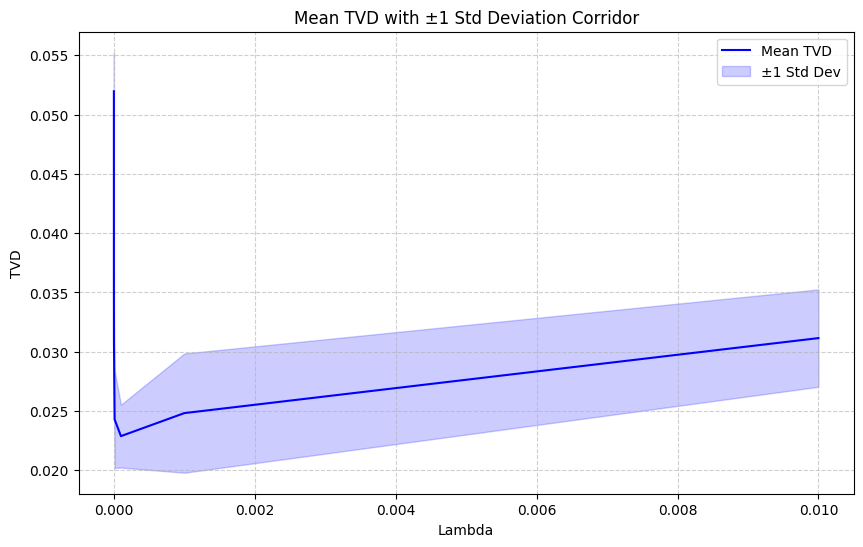

In [18]:
plot_stats(lambdas=more_lambdas, stats=more_tvd_stats, value_name='TVD')

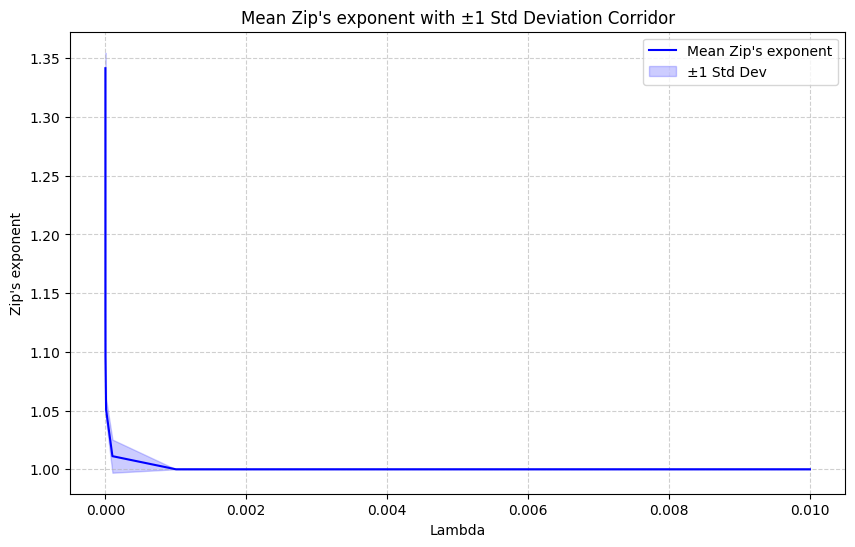

In [19]:
plot_stats(lambdas=more_lambdas, stats=more_s_stats, value_name='Zip\'s exponent')